In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (18)\loan_approval_dataset.csv")

In [221]:
df.shape

(4269, 13)

In [222]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [223]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   str  
 3    self_employed             4269 non-null   str  
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB


In [224]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [225]:
df.duplicated().sum()

np.int64(0)

In [226]:
df.columns = df.columns.str.strip()

In [227]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='str')

In [228]:
df['loan_status'].unique()

<StringArray>
[' Approved', ' Rejected']
Length: 2, dtype: str

In [229]:
df['loan_status'] = df['loan_status'].str.strip()

In [230]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['loan_status'] = le.fit_transform(df['loan_status'])

In [231]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [232]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='str')

In [233]:
df.corr(numeric_only=True)['loan_status']

loan_id                     0.017685
no_of_dependents           -0.018114
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

In [234]:
df.drop('loan_id', axis=1, inplace=True)

In [235]:
df['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [236]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [237]:
df['total_assets_value'] = df['luxury_assets_value'] + df['residential_assets_value'] + df['commercial_assets_value'] + df['bank_asset_value']
df['loan_to_income'] = df['loan_amount'] / df['income_annum']
df['loan_to_asset'] = df['loan_amount'] / df['total_assets_value']
df['asset_to_income'] = df['total_assets_value'] / df['income_annum']

<Axes: xlabel='loan_status', ylabel='count'>

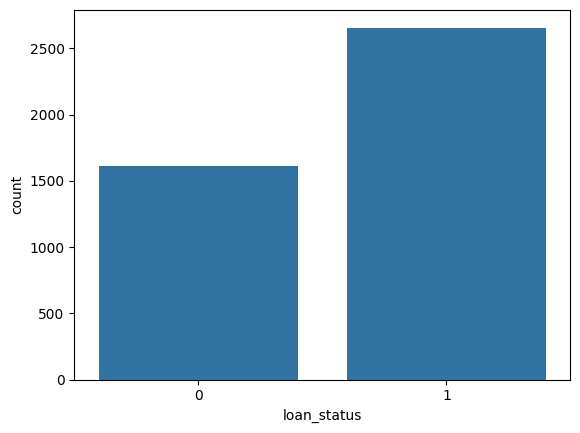

In [238]:
sns.countplot(data=df,x='loan_status')

Text(0.5, 1.0, 'self employed vs loan amount')

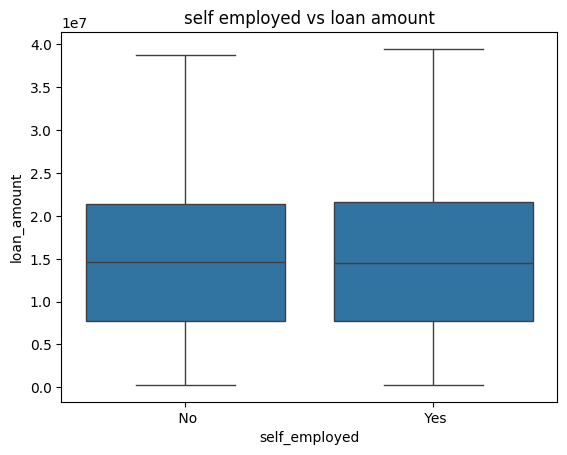

In [239]:
sns.boxplot(data=df,x='self_employed',y='loan_amount')
plt.title('self employed vs loan amount')

#from graph we can say that employement alone is NOT a strong deciding factor for loan approval.

Text(0.5, 1.0, 'cibil score vs loan status')

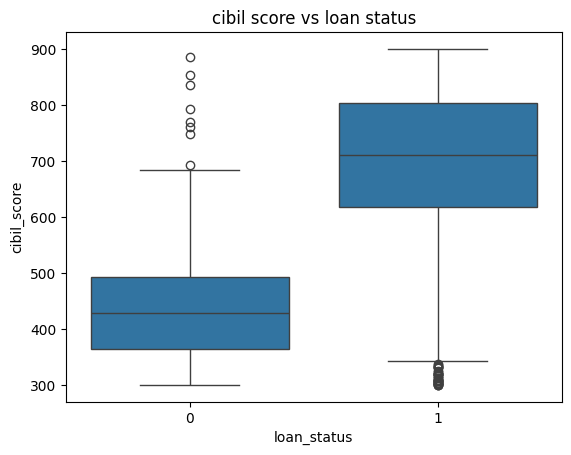

In [240]:
sns.boxplot(data=df,y='cibil_score',x='loan_status')
plt.title('cibil score vs loan status')
#since we can use desiciontree or xgboost outlier didnt effect to much

In [241]:
#how to handle outlier -> logistic regression
#Q1 = df['cibil_score'].quantile(0.25)
#Q3 = df['cibil_score'].quantile(0.75)
#IQR = Q3 - Q1

#df = df[(df['cibil_score'] >= Q1 - 1.5*IQR) &
#        (df['cibil_score'] <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Income vs Loan Status')

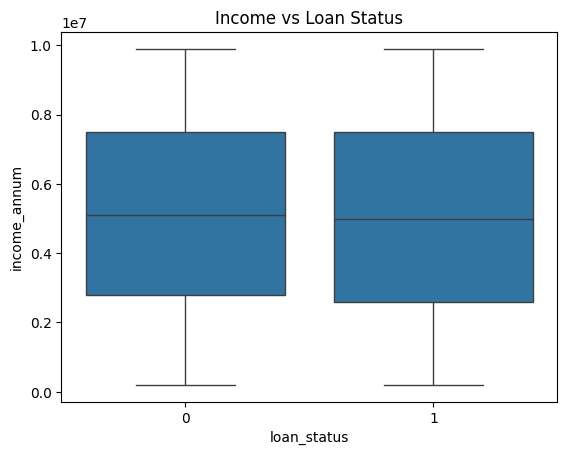

In [242]:
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title("Income vs Loan Status")
#from graph we can say that Income alone is NOT a strong deciding factor for loan approval.

<Axes: >

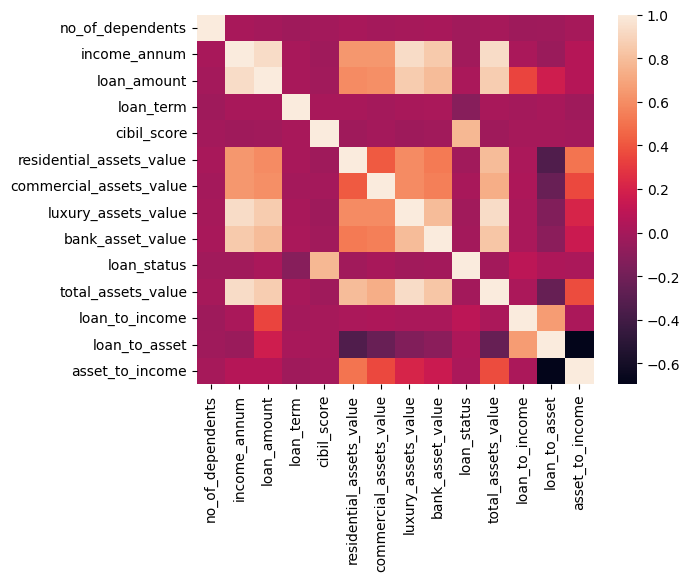

In [243]:
sns.heatmap(data=df.corr(numeric_only=True))

In [244]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value,loan_to_income,loan_to_asset,asset_to_income
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,0.589744,5.281250
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975610,0.717647,4.146341
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,0.514731,6.340659
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,0.582543,6.426829
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,0.440000,5.612245


In [245]:
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

In [246]:
df['education'].unique()

<StringArray>
['Graduate', 'Not Graduate']
Length: 2, dtype: str

In [247]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [248]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [249]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'total_assets_value', 'loan_to_income', 'loan_to_asset',
       'asset_to_income'],
      dtype='str')

In [250]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   str    
 2   self_employed             4269 non-null   str    
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   cibil_score               4269 non-null   int64  
 7   residential_assets_value  4269 non-null   int64  
 8   commercial_assets_value   4269 non-null   int64  
 9   luxury_assets_value       4269 non-null   int64  
 10  bank_asset_value          4269 non-null   int64  
 11  loan_status               4269 non-null   int64  
 12  total_assets_value        4269 non-null   int64  
 13  loan_to_income            4269 non-null   float64
 14  loan_to_asset      

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [252]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cat_cols = ['education','self_employed']
num_cols = ['no_of_dependents','income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
        'total_assets_value', 'loan_to_income', 'loan_to_asset',
       'asset_to_income']

In [253]:
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [254]:
transformer = ColumnTransformer(transformers=[('ohe',ohe,cat_cols),
                                              ('scaler',scaler,num_cols)
                                              ]
                                ,remainder='drop')

In [255]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [256]:
X_train.shape

(3415, 15)

In [272]:
X_train_transformed.shape

(3415, 15)

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [259]:
import optuna

In [260]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

In [261]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "eval_metric": "logloss",
        "random_state": 42
    }

    pipe = Pipeline([
        ("preprocess", transformer),
        #("smote", SMOTE(random_state=42)),
        ("model", XGBClassifier(**params))
    ])

    score = cross_val_score(
        pipe,
        X_train,     # raw dataframe
        y_train,
        cv=3,
        scoring="roc_auc"
    ).mean()

    return score

In [262]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)
#direction="maximize" tells Optuna to look for the highest possible score
print("Best Score:", study.best_value)
print("Best Params:", study.best_params)

[I 2026-02-19 08:01:25,788] A new study created in memory with name: no-name-2b786991-f265-4a81-8309-35ddcbcb56a1


[W 2026-02-19 08:01:26,573] Trial 0 failed with parameters: {'n_estimators': 272, 'max_depth': 10, 'learning_rate': 0.12519349460689935, 'subsample': 0.6348635970867343} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "d:\anakonda\envs\campusx\Lib\site-packages\optuna\study\_optimize.py", line 206, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23016\2881465021.py", line 23, in objective
    score = cross_val_score(
            ~~~~~~~~~~~~~~~^
        pipe,
        ^^^^^
    ...<3 lines>...
        scoring="roc_auc"
        ^^^^^^^^^^^^^^^^^
    ).mean()
    ^
  File "d:\anakonda\envs\campusx\Lib\site-packages\sklearn\utils\_param_validation.py", line 218, in wrapper
    return func(*args, **kwargs)
  File "d:\anakonda\envs\campusx\Lib\site-packages\sklearn\model_selection\_validation.py", line 651, in cross_val_score
    cv_results = cross_validate(
        estimator=estimator,
    ...

KeyboardInterrupt: 

In [ ]:
best_params = study.best_params

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_model = Pipeline([
    ("preprocess", transformer),
    #("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(**study.best_params))
])

final_model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ohe', ...), ('scaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The giv

In [270]:
import pickle

pickle.dump(final_model , open('model.pkl','wb'))

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9976580796252927

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

score = cross_val_score(
    XGBClassifier(),
    df[['cibil_score']],
    y,
    cv=5,
    scoring="accuracy"
)

print(score.mean())

0.9522127441101939


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[322   1]
 [  1 530]]


In [ ]:
test_data = pd.DataFrame([{
    "no_of_dependents": 1,
    "education": "Graduate",
    "self_employed": "No",
    "income_annum": 9000000,
    "loan_amount": 15000000,
    "loan_term": 12,
    "cibil_score": 780,
    "residential_assets_value": 5000000,
    "commercial_assets_value": 8000000,
    "luxury_assets_value": 12000000,
    "bank_asset_value": 6000000
}])


In [263]:
def add_features(df):
    df["total_assets_value"] = (
        df["luxury_assets_value"] +
        df["residential_assets_value"] +
        df["commercial_assets_value"] +
        df["bank_asset_value"]
    )

    df["loan_to_income"] = df["loan_amount"] / df["income_annum"]
    df["loan_to_asset"] = df["loan_amount"] / df["total_assets_value"]
    df["asset_to_income"] = df["total_assets_value"] / df["income_annum"]

    return df

In [264]:
test_data = add_features(test_data)
final_model.predict(test_data)

array([1])

In [265]:
test_data = pd.DataFrame([{
    "no_of_dependents": 4,
    "education": "Not Graduate",
    "self_employed": "Yes",
    "income_annum": 3000000,
    "loan_amount": 25000000,
    "loan_term": 20,
    "cibil_score": 420,
    "residential_assets_value": 2000000,
    "commercial_assets_value": 1000000,
    "luxury_assets_value": 3000000,
    "bank_asset_value": 1500000
}])

In [266]:
test_data = add_features(test_data)
final_model.predict(test_data)

array([0])

In [271]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value,loan_to_income,loan_to_asset,asset_to_income
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,0.589744,5.281250
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975610,0.717647,4.146341
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,0.514731,6.340659
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,0.582543,6.426829
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,0.440000,5.612245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0,7400000,2.300000,0.310811,7.400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,20000000,3.424242,0.565000,6.060606
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,39000000,3.676923,0.612821,6.000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,28800000,3.121951,0.444444,7.024390


In [267]:
test_data = pd.DataFrame([{
    "no_of_dependents": 2,
    "education": "Graduate",
    "self_employed": "Yes",
    "income_annum": 6000000,
    "loan_amount": 18000000,
    "loan_term": 15,
    "cibil_score": 650,
    "residential_assets_value": 4000000,
    "commercial_assets_value": 3000000,
    "luxury_assets_value": 7000000,
    "bank_asset_value": 2500000
}])

In [273]:
test_data = add_features(test_data)
final_model.predict(test_data)

array([0])

In [274]:
import pandas as pd

test_cases = [
    # 1 ✅ Approved (High CIBIL)
    {
        "no_of_dependents": 1,
        "education": "Graduate",
        "self_employed": "No",
        "income_annum": 9000000,
        "loan_amount": 15000000,
        "loan_term": 12,
        "cibil_score": 790,
        "residential_assets_value": 6000000,
        "commercial_assets_value": 7000000,
        "luxury_assets_value": 10000000,
        "bank_asset_value": 5000000
    },

    # 2 ❌ Rejected (Very Low CIBIL)
    {
        "no_of_dependents": 3,
        "education": "Not Graduate",
        "self_employed": "Yes",
        "income_annum": 4000000,
        "loan_amount": 20000000,
        "loan_term": 20,
        "cibil_score": 410,
        "residential_assets_value": 2000000,
        "commercial_assets_value": 3000000,
        "luxury_assets_value": 4000000,
        "bank_asset_value": 1500000
    },

    # 3 ❌ Rejected (Low CIBIL + High Loan)
    {
        "no_of_dependents": 5,
        "education": "Graduate",
        "self_employed": "Yes",
        "income_annum": 5000000,
        "loan_amount": 28000000,
        "loan_term": 15,
        "cibil_score": 480,
        "residential_assets_value": 3000000,
        "commercial_assets_value": 2000000,
        "luxury_assets_value": 5000000,
        "bank_asset_value": 1000000
    },

    # 4 ✅ Approved (Good Score + Balanced Loan)
    {
        "no_of_dependents": 0,
        "education": "Graduate",
        "self_employed": "No",
        "income_annum": 7500000,
        "loan_amount": 12000000,
        "loan_term": 10,
        "cibil_score": 720,
        "residential_assets_value": 4000000,
        "commercial_assets_value": 5000000,
        "luxury_assets_value": 6000000,
        "bank_asset_value": 3000000
    },

    # 5 ❌ Rejected (Medium Score but Risky Loan Amount)
    {
        "no_of_dependents": 2,
        "education": "Not Graduate",
        "self_employed": "No",
        "income_annum": 4500000,
        "loan_amount": 25000000,
        "loan_term": 18,
        "cibil_score": 520,
        "residential_assets_value": 3500000,
        "commercial_assets_value": 2500000,
        "luxury_assets_value": 3000000,
        "bank_asset_value": 2000000
    },

    # 6 ✅ Approved (Strong Assets + High Score)
    {
        "no_of_dependents": 4,
        "education": "Graduate",
        "self_employed": "Yes",
        "income_annum": 11000000,
        "loan_amount": 18000000,
        "loan_term": 12,
        "cibil_score": 760,
        "residential_assets_value": 9000000,
        "commercial_assets_value": 8000000,
        "luxury_assets_value": 15000000,
        "bank_asset_value": 7000000
    },

    # 7 ❌ Rejected (Very Poor Credit Score)
    {
        "no_of_dependents": 1,
        "education": "Not Graduate",
        "self_employed": "Yes",
        "income_annum": 3000000,
        "loan_amount": 10000000,
        "loan_term": 8,
        "cibil_score": 350,
        "residential_assets_value": 1500000,
        "commercial_assets_value": 1000000,
        "luxury_assets_value": 2000000,
        "bank_asset_value": 800000
    },

    # 8 ✅ Approved (Stable Income + Good Score)
    {
        "no_of_dependents": 2,
        "education": "Graduate",
        "self_employed": "No",
        "income_annum": 8500000,
        "loan_amount": 14000000,
        "loan_term": 14,
        "cibil_score": 730,
        "residential_assets_value": 5000000,
        "commercial_assets_value": 4000000,
        "luxury_assets_value": 7000000,
        "bank_asset_value": 3500000
    },

    # 9 ❌ Rejected (High Loan, Low Assets)
    {
        "no_of_dependents": 3,
        "education": "Graduate",
        "self_employed": "No",
        "income_annum": 6000000,
        "loan_amount": 30000000,
        "loan_term": 20,
        "cibil_score": 540,
        "residential_assets_value": 2000000,
        "commercial_assets_value": 1500000,
        "luxury_assets_value": 2500000,
        "bank_asset_value": 1000000
    },

    # 10 ✅ Approved (Excellent Credit Score)
    {
        "no_of_dependents": 0,
        "education": "Graduate",
        "self_employed": "Yes",
        "income_annum": 9500000,
        "loan_amount": 16000000,
        "loan_term": 10,
        "cibil_score": 810,
        "residential_assets_value": 6500000,
        "commercial_assets_value": 7500000,
        "luxury_assets_value": 9000000,
        "bank_asset_value": 6000000
    }
]

# Convert into DataFrame
test_df = pd.DataFrame(test_cases)

# Add engineered features
test_df = add_features(test_df)

# Predict
predictions = final_model.predict(test_df)

print("Predictions:", predictions)


Predictions: [1 0 0 1 0 1 0 1 0 1]


In [276]:
print(final_model.classes_)
df["loan_status"].value_counts()


[0 1]


loan_status
1    2656
0    1613
Name: count, dtype: int64